clean the dataset and extract the models, get the average
create: hasindicative price
add theindicative price and save

In [1]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# This will automatically reload src/dtree.py every time you make changes and save the file
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('./extra_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [30]:
df = df[df.year == 2018]

In [31]:
print(len(df))

609


In [88]:
combined = pd.read_csv('./numerical_cleaned.csv')
# needed_models = df_['model'].unique().tolist()
# print(needed_models)
prices = pd.read_csv('numerical_cleaned_train.csv')['price']
trainLen = len(prices)
train = combined[:trainLen]
test = combined[trainLen:]
# combined, train, test, price

In [89]:
def getModelToPrice(newCars, usePower=True):
    modelToPrice = defaultdict(list)
    for idx, row in newCars.iterrows():
        model = row['model']
        power = row['power']
        if usePower == False:
            power = ''
        st = model + str(power)
        p = price.iloc[idx]
        modelToPrice[st].append(p) ##detail the features
    return modelToPrice

In [90]:
newCars = train[train.age <= 6]
price = pd.read_csv('numerical_cleaned_train.csv')['price']
from collections import defaultdict

modelToPrice = getModelToPrice(newCars)
# print(len(needed_models))

In [91]:
# fill in selling price by model to price
combined['new_price'] = pd.Series([np.nan] * len(combined))

for idx, row in combined.iterrows():
    model = row['model']
    power = row['power']
    st = model + str(power)
    p = np.average(modelToPrice[st])
    combined.at[idx, 'new_price'] = p
    
print(combined['new_price'].isnull().sum())

G:\softwares\envs\4277lab\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
G:\softwares\envs\4277lab\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


18643


In [92]:
from sklearn.metrics import mean_squared_error
new = combined[:trainLen].copy()
idx = new[~new.new_price.isnull()].index.tolist()
predicted = new[~new.new_price.isnull()]['new_price']
truth = []
for i in idx:
    x = prices[i]
    truth.append(x)
mse=mean_squared_error(predicted, truth)
print(mse)

6263692019.579191


In [63]:
modelToPrice = getModelToPrice(newCars, False)
for idx, row in combined.iterrows():
    price = row['new_price']
    if pd.isna(price):
        model = row['model']
        power = row['power']
        power = ''
        st = model + str(power)
        p = np.average(modelToPrice[st])
        combined.at[idx, 'new_price'] = p

In [64]:
print(combined[trainLen:]['new_price'].isnull().sum()) ## directly keep the results

3149


In [74]:
from sklearn.metrics import mean_squared_error
idx = combined[~combined.new_price.isnull()].index.tolist()
predicted = combined[~combined.new_price.isnull()][:trainLen]['new_price']
truth = []
for i in idx:
    x = prices[i]
    truth.append(x)
mse=mean_squared_error(predicted, truth)
print(mse)

KeyError: 16785

In [ ]:
cars = train[train.age <= 12 & train.age > 6]
modelToPrice = getModelToPrice(cars, False)
for idx, row in combined.iterrows():
    price = row['new_price']
    if pd.isna(price):
        model = row['model']
        power = row['power']
        power = ''
        st = model + str(power)
        p = np.average(modelToPrice[st])
        combined.at[idx, 'new_price'] = p

In [23]:
df_['selling_price'] = df_['model']
# fill in make
df_valid = df_.dropna(subset = ['make'])

missingMake = df_.make.isnull()
dfm = df_[missingMake]
missingModelAge = []
for idx, row in dfm.iterrows():
    model = row['model']
    missingModelAge.append(model)

mapper = {}
for idx, row in df_valid.iterrows():
    model = row['model']
    make = row['make']
    mapper[model] = make

for idx, row in dfm.iterrows():
    model = row['model']
    df_.at[idx, 'make'] = mapper[model]

print(df_['make'].isnull().sum())

0


In [19]:
# from collections import defaultdict

# modelToPrice = defaultdict(list)
# for idx, row in newCars.iterrows():
#     tokens = row['name'].split(' ')
#     for token in tokens:
#         token = token.lower()
#         if token in needed_models:
#             price = row['selling_price']
#             modelToPrice[token].append(price) ##detail the features
# print(len(modelToPrice))
# print(len(needed_models))

94
742


In [ ]:
# for data points missing selling price but make has a selling price, fill in its price based on similar power under the same make

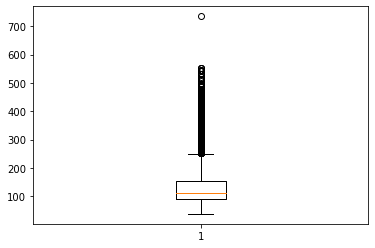

In [20]:
plt.boxplot(df_['power'])
plt.show()

In [21]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21784 entries, 0 to 21783
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       21784 non-null  int64  
 1   power            21784 non-null  float64
 2   engine_cap       21784 non-null  float64
 3   coe              21784 non-null  float64
 4   dereg_value      21784 non-null  float64
 5   mileage          21784 non-null  float64
 6   omv              21784 non-null  float64
 7   age              21784 non-null  int64  
 8   remaining_coe    21784 non-null  int64  
 9   bus/mini bus     21784 non-null  int64  
 10  hatchback        21784 non-null  int64  
 11  luxury sedan     21784 non-null  int64  
 12  mid-sized sedan  21784 non-null  int64  
 13  mpv              21784 non-null  int64  
 14  others           21784 non-null  int64  
 15  sports car       21784 non-null  int64  
 16  stationwagon     21784 non-null  int64  
 17  suv         

In [27]:
# for data points missing selling price 
# but make has a selling price, fill in its price based on similar power under the same make
df_['new_power'] = df_['power']
df_['new_power'] = df_['new_power'] // 50 * 50

In [ ]:
for idx, row in df_.iterrows():
    model = row['model']
    if model in modelToPrice:
        price = 